In [4]:
!head -n 10 datasets/babynames/yob1880.txt

In [5]:
import pandas as pd
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names = ['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [6]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [7]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] =  year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index = True)

In [8]:
names.groupby(['year', 'sex']).births.sum().unstack()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


In [9]:
total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


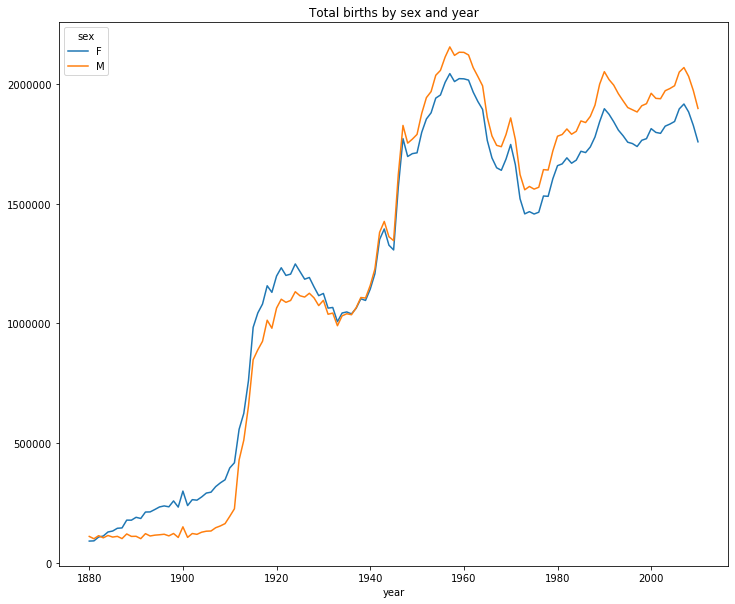

In [10]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (12, 10))
total_births.plot(title = 'Total births by sex and year')

In [23]:
for (k1, k2), group in names.groupby(['year', 'sex']):
    print((k1, k2))
    print(group)

(1880, 'F')
          name sex  births  year      prop
0         Mary   F    7065  1880  0.077643
1         Anna   F    2604  1880  0.028618
2         Emma   F    2003  1880  0.022013
3    Elizabeth   F    1939  1880  0.021309
4       Minnie   F    1746  1880  0.019188
..         ...  ..     ...   ...       ...
937        Ula   F       5  1880  0.000055
938     Vannie   F       5  1880  0.000055
939     Verona   F       5  1880  0.000055
940     Vertie   F       5  1880  0.000055
941      Wilma   F       5  1880  0.000055

[942 rows x 5 columns]
(1880, 'M')
           name sex  births  year      prop
942        John   M    9655  1880  0.087381
943     William   M    9533  1880  0.086277
944       James   M    5927  1880  0.053641
945     Charles   M    5348  1880  0.048401
946      George   M    5126  1880  0.046392
...         ...  ..     ...   ...       ...
1995     Woodie   M       5  1880  0.000045
1996     Worthy   M       5  1880  0.000045
1997     Wright   M       5  1880  0.000

[5163 rows x 5 columns]
(1916, 'M')
           name sex  births  year      prop
134243     John   M   50046  1916  0.056222
134244  William   M   40417  1916  0.045405
134245    James   M   35572  1916  0.039962
134246   Robert   M   31743  1916  0.035661
134247   Joseph   M   23890  1916  0.026838
...         ...  ..     ...   ...       ...
138771    Zelma   M       5  1916  0.000006
138772     Zera   M       5  1916  0.000006
138773   Zettie   M       5  1916  0.000006
138774     Ziba   M       5  1916  0.000006
138775     Zina   M       5  1916  0.000006

[4533 rows x 5 columns]
(1917, 'F')
            name sex  births  year      prop
138776      Mary   F   64270  1917  0.059444
138777     Helen   F   34241  1917  0.031670
138778   Dorothy   F   28851  1917  0.026684
138779  Margaret   F   25561  1917  0.023641
138780      Ruth   F   23562  1917  0.021793
...          ...  ..     ...   ...       ...
144083     Zilla   F       5  1917  0.000005
144084   Zilphia   F       5  1917  0.0

[6213 rows x 5 columns]
(1951, 'M')
           name sex  births  year      prop
478386    James   M   87046  1951  0.046361
478387   Robert   M   86189  1951  0.045905
478388     John   M   81383  1951  0.043345
478389  Michael   M   72663  1951  0.038701
478390    David   M   64640  1951  0.034428
...         ...  ..     ...   ...       ...
482620  Woodley   M       5  1951  0.000003
482621   Worthy   M       5  1951  0.000003
482622   Yancey   M       5  1951  0.000003
482623  Yisroel   M       5  1951  0.000003
482624  Zackery   M       5  1951  0.000003

[4239 rows x 5 columns]
(1952, 'F')
            name sex  births  year      prop
482625     Linda   F   67071  1952  0.036168
482626      Mary   F   65699  1952  0.035428
482627  Patricia   F   53083  1952  0.028625
482628   Deborah   F   49796  1952  0.026852
482629     Susan   F   41343  1952  0.022294
...          ...  ..     ...   ...       ...
489008    Woodie   F       5  1952  0.000003
489009   Yevette   F       5  1952  0.0

[12811 rows x 5 columns]
(1986, 'M')
                name sex  births  year      prop
993846       Michael   M   64164  1986  0.034882
993847   Christopher   M   56661  1986  0.030803
993848       Matthew   M   46897  1986  0.025495
993849        Joshua   M   37524  1986  0.020400
993850         David   M   37114  1986  0.020177
...              ...  ..     ...   ...       ...
1001658          Zia   M       5  1986  0.000003
1001659          Zoe   M       5  1986  0.000003
1001660        Zoilo   M       5  1986  0.000003
1001661       Zollie   M       5  1986  0.000003
1001662       Zubair   M       5  1986  0.000003

[7817 rows x 5 columns]
(1987, 'F')
             name sex  births  year      prop
1001663   Jessica   F   55983  1987  0.032220
1001664    Ashley   F   54826  1987  0.031554
1001665    Amanda   F   41784  1987  0.024048
1001666  Jennifer   F   32687  1987  0.018813
1001667     Sarah   F   27876  1987  0.016044
...           ...  ..     ...   ...       ...
1014905      Zol

In [12]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [19]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [36]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace = True, drop = True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [38]:
pieces = []
for name, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by = 'births', ascending = 'False')[:1000])
pd.concat(pieces, ignore_index = True)

,name,sex,births,year,prop
0,Wilma,F,5,1880,0.000055
1,Estie,F,5,1880,0.000055
2,Etter,F,5,1880,0.000055
3,Fronnie,F,5,1880,0.000055
4,Genie,F,5,1880,0.000055
...,...,...,...,...,...
261872,Christopherjame,M,5,2010,0.000003
261873,Christy,M,5,2010,0.000003
261874,Chuck,M,5,2010,0.000003
261875,Chuckie,M,5,2010,0.000003


In [39]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [41]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [42]:
subsets = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f92d1a0d0>,
      dtype=object)

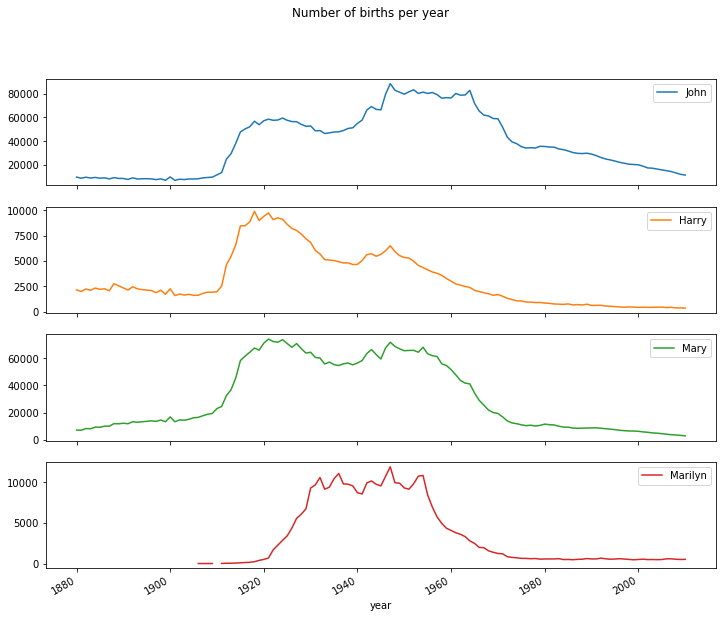

In [43]:
subsets.plot(subplots = True, figsize = (12, 10), grid = False, title = 'Number of births per year')

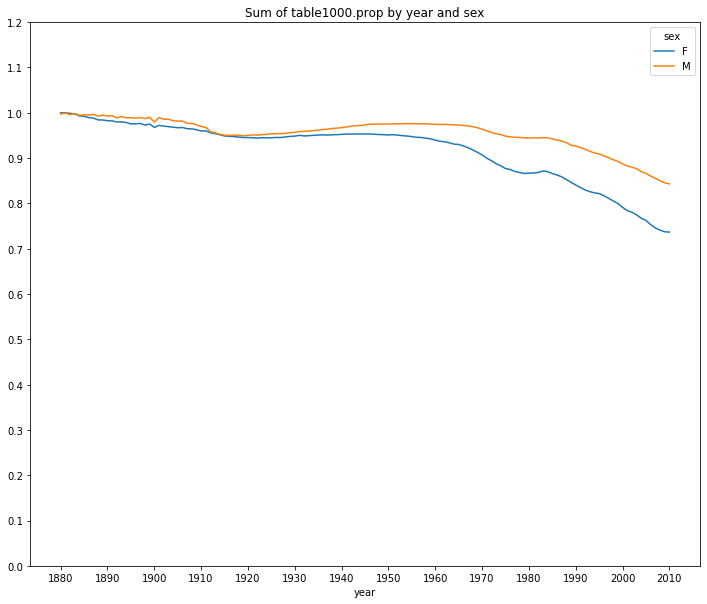

In [46]:
import numpy as np
table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)
table.plot(title = 'Sum of table1000.prop by year and sex', yticks = np.linspace(0, 1.2, 13), xticks = range(1880, 2020, 10))

In [47]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [51]:
prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [52]:
prop_cumsum.values.searchsorted(0.5)

116

In [59]:
df = boys[boys.year == 1900]
in1990 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1990.values.searchsorted(0.5) + 1

25

In [62]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [63]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


In [64]:
diversity.tail()

sex,F,M
year,,
2006,209,99
2007,223,103
2008,234,109
2009,241,114
2010,246,117


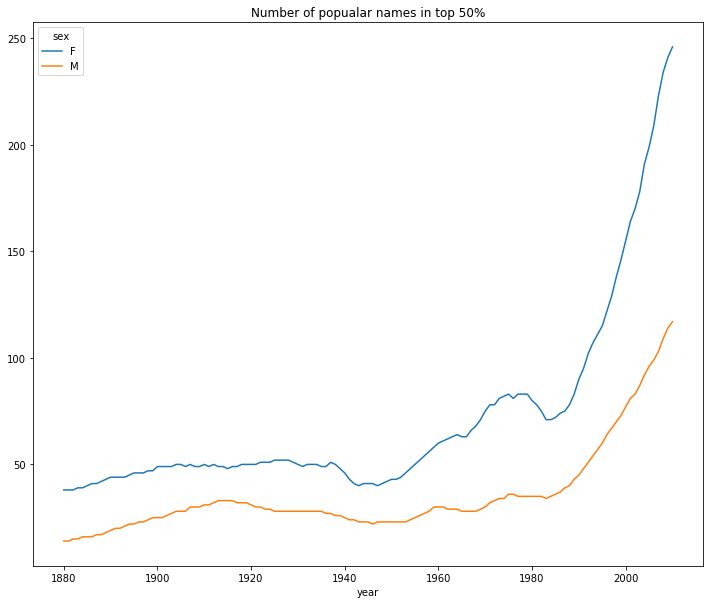

In [65]:
diversity.plot(title = 'Number of popualar names in top 50%')